# Approximate Inference Algorithms



## CSCI E-83
## Stephen Elston


In the previous lesson we examined several exact inference methods. While factoring the distribution and restructuring the graph reduces the computational complexity there are limits. Exact inference methods are **tabular** in nature. A tabular method must perform the full set of matrix multiplications on the messages. 

For many real-world applications, tabular methods are simply infeasible. In this lesson we will focus on **approximate inference algorithms**. Approximate inference algorithms operate by **random sampling**. The posterior distribution is approximated by the samples.   

In this lesson we will focus on the **learning** aspects of the problem. 

For Bayesian networks, approximate inference or learning is used in two ways:  
1. **Parameter estimation** where the parameters of a model are estimated. The model might be .............  
2. **Structure estimation** is the process of estimating the structure of the graphical model. 

The role of learning in an intelligent agent is illustrated in the figure below.

<img src="img/Learning.JPG" alt="Drawing" style="width:400px; height:200px"/>
<center> **Learning in an intelligent agent** </center>

## Exact tabular methods vs. approximations

In the previous lesson we examined exact inference methods. These methods are applied primarily to tabular data. In tabular methods every entry in each CDP table must be propagated in the messages. The computational complexity of these methods can be a serious limitations on scalability.  

In this lesson we will explore approximate inference methods. Approximate methods are generally much more scalable than exact methods. As a result, approximate methods are used in large scale solutions.      

## Simple parameter estimation example

In previous lessons we used a belief network of a student looking for a job. As you will recall the student must submit her GRE score, $S$ and her letter of recommendation, $L$. Said that the probability of the GRE score (high, low) was conditional on the student's intelligence, $I$. We had a prior distribution of $I = [0.8, 0.2] = [p(high), p(low)]$. But, how do we estimate the parameters for this distribution?

There are several methods which can be used to estimate the parameters of a distribution:
- Frequentist **maximum likelihood** or **ML** methods which only require that a likelihood function be specified. 
- Bayesian **maximum a-postiori** or **MAP** methods, which require the specification of both a likelihood function and a prior distribution of the model parameters. 

### The Bernoulli and Beta distributions

For this example, we will work with a binary variable with states {0,1}. A **single realization** of such a variable has a **Bernoulli distribution**. We can express the Bernoulli distribution as:

$$p(\nu = 1) = \Theta \\
where\\
\nu = an\ observation\\
\Theta = probability\ parameter$$

For a series of observations of a binary valued variable we use the **Binomial distribution**. We call each observation where $\nu = 1$ a **success**. The Binomial distribution of $k$ successes in $n$ trials is then expressed as:

$$p(\nu = k\ |\ \Theta) = \binom{n}{k} \Theta^k (1-\Theta)^{n-k}$$

We want to specify a **Binomial likelihood** in Bayes theorem, we will also need to specify a prior distribution. We pick a prior distribution which is **conjugate** to the likelihood distribution so that the posterior distribution is the same as the prior. We can express this concept as:

$$posterior\_distribution(hypothesis\ |\ data) = \frac{likelihood(data\ |\ hypothesis)* conjugate\_prior(hypothesis)}{marginal\ distribtion\ data }\\
where\\
posterior\_distribution\ is\ same\ family\ as\ prior\_distribution$$

The question is, which distribution is the conjugate to the Binomial distribution? The answer is the **Beta distribution**. We can express the Beta distribution as: 

$$p(x\ |\ \alpha, \beta) = \frac{1}{B(\alpha, \beta)}x^{\alpha - 1}(1-x)^{\beta - 1},\ 0 \le x \le 1\\
where\\
B(\alpha, \beta) = \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha,\beta)}\\
and\\
\Gamma(x) = Gamma\ function$$

At first glance, the Beta distribution is a bit complicated. But for the most part the normalization with the Gamma function are not terribly important. 

You can develop some intuition about the Beta distribution by plotting it for various values of $\alpha$ and $\beta$. Execute the code in the cell below and examine the results. 

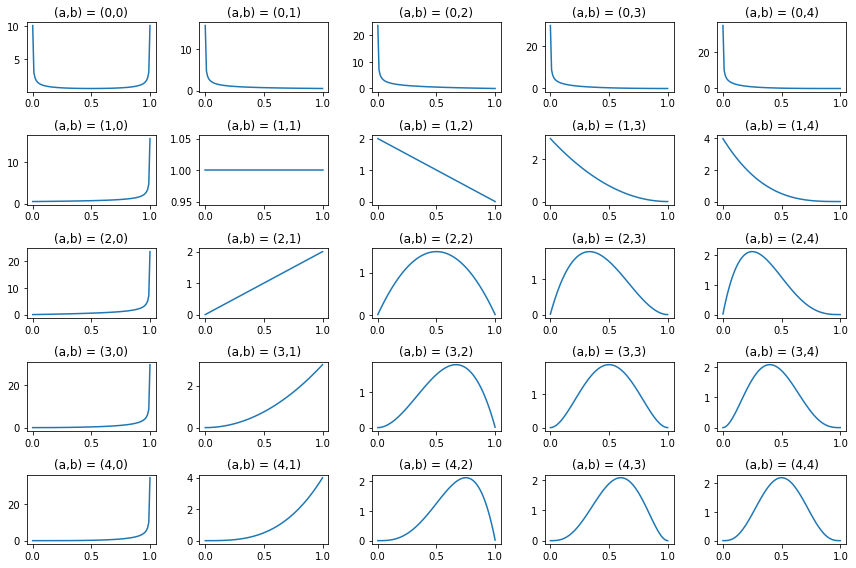

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import scipy.stats as ss
%matplotlib inline

plt.figure(figsize=(12, 8))

alpha = [.5, 1, 2, 3, 4]
beta = alpha[:]
x = np.linspace(.001, .999, num=100)

for i, (a, b) in enumerate(it.product(alpha, beta)):
    plt.subplot(len(alpha), len(beta), i+1)
    plt.plot(x, ss.beta.pdf(x, a, b))
    plt.title('(a,b) = (%d,%d)' % (a,b))
plt.tight_layout()    

Some points to notice here:

- The range is $0 \le Beta(x) \le 1$.
- If $\alpha \gt \beta$ the distribution is left skewed, if $\alpha \lt \beta$ the distribution is right skewed, and if $\alpha = \beta$ the distribution is symmetric.
- For $\alpha = 1$, $\beta = 1$ the distribution is uniform. 


With these preliminary in mind, we will now look at methods to estimate the parameter of the Binomial likelihood distribution $\theta$.

### Maximum likelihood method

We will not go into the details of **maximum likelihood estimation** (**MLE**). These details can be found in many standard texts on statistics and machine learning including........................



### Bayesian learning

We can now try the Bayesian approach to estimating the parameter $\Theta$. Conceptually you can visualize this process as a directed Bayesian model as shown below. 

<img src="img/PlateDiagram.JPG" alt="Drawing" style="width:400px; height:200px"/>
<center> **Bayes network and plate diagram for parameter estimation** </center>

The parameter $\Theta$ is causal to the data values $\{ \nu^1, \nu^2, \nu^3, \ldots \nu^N \}$. This relationship is shown as a DAG on the left side of the figure above. On the right side of the diagram is a summary using **plate notation**. The plate is short hand for the $N$ values. 

There 

$$p(\Theta\ |\ \nu^1, \nu^2, \nu^3, \ldots \nu^N) \propto p(\Theta) \prod_{n=1}^N p(\nu^n\ |\ \Theta)
= p(\Theta) \prod_{n=1}^N |Theta^{I(\nu^n=1)}(1 - \Theta)^{I(\nu^n=0)}\\
\propto p(\Theta)\ \Theta^{\sum_{n=1}^N I(\nu^n=1)}(1 - \Theta)^{\sum_{n=1}^N I(\nu^n=0)} $$

For a simple binary case of $\{ True, False \}$ the solution can be obtained with the prior distribution $p(\Theta)$ and the counts, $\{ N_T, N_F \}$.

$$p(\Theta\ |\ \nu^1, \nu^2, \nu^3, \ldots \nu^N) \propto p(\Theta)\ \Theta^{N_T} (1 - \Theta)^{N_F}$$

## Global and Local Parameter Independence

In the foregoing we have only considered the univariate Binomial and Beta distributions. But, real-world problems have many parameters. We need a way to deal with this situation without the mathematical and computational complexity of the full multivariate problem. 

Our approach is to factorize the joint distribution to introduce **global independence** and **local independence**. The global independence assumption allows us to factorize the **posterior distribution** over the conditional tables. The local independence assumption allows us to factor the prior distribution, a necessary condition for the global independence assumption. 

### Global independence assumption

Let's start with the global independence assumption using an example. Recalling the student example of previous lessons, let's consider the parameterized joint distribution of the student's grade in the machine learning course. Using plate notation we call illustrate this part of the DAG as shown here.

<img src="img/Factorizing.JPG" alt="Drawing" style="width:300px; height:400px"/>
<center> **Plate diagram for factorizing joint distribution $p(\Theta_D, \Theta_I, \Theta_G)$** </center>

Let's assume we can factorize the joint distribution as follows.

$$p(\Theta_D, \Theta_I, \Theta_G) = p(\Theta_D)p(\Theta_I)p(\Theta_G)$$

Were $\Theta_D$, $\Theta_I$, and $\Theta_G$ are parameters of the distributions of difficulty, intelligence and grade respectively. 

If we assume the table (vector) of N data values, $\mathcal{V}$, are i.i.d. we can expand the above as:

$$p(\Theta_D, \Theta_I, \Theta_G) = p(\Theta_D)p(\Theta_I)p(\Theta_G) \prod_{n=1}^N p(d^n\ |\ \Theta_D)p(i^n\ |\ \Theta_I)p(g^n\ |\ d^n, i^n, \Theta_G)$$



#### Copyright 2018 Stephen F Elston. All rights reserved.